In [1]:
!git clone https://github.com/lekshmi-j/topic-identification-nlp.git


Cloning into 'topic-identification-nlp'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 56 (delta 22), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 34.23 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
%cd topic-identification-nlp



/content/topic-identification-nlp


In [3]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00


In [6]:
import pandas as pd

df = pd.read_csv("data/processed/20newsgroups_processed.csv")

X = df["clean_text"]
y = df["topic"]

print(X.shape)
print("Number of classes:", y.nunique())


(238817,)
Number of classes: 21


In [8]:
y.value_counts()


,count
topic,
talk.politics.mideast.txt,17578
alt.atheism.txt,17564
comp.graphics.txt,16854
soc.religion.christian.txt,14556
sci.crypt.txt,14386
sci.space.txt,13102
talk.politics.guns.txt,13062
comp.windows.x.txt,12746
sci.med.txt,11688


In [9]:
min_samples = 2  # minimum required for stratification

valid_classes = y.value_counts()[y.value_counts() >= min_samples].index

df_filtered = df[df["topic"].isin(valid_classes)]

X = df_filtered["clean_text"]
y = df_filtered["topic"]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [16]:
X.isna().sum()


np.int64(2195)

In [17]:
df_filtered = df_filtered.dropna(subset=["clean_text"])


In [19]:
df_filtered = df_filtered[df_filtered["clean_text"].str.strip() != ""]


In [21]:
X = df_filtered["clean_text"]
y = df_filtered["topic"]


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_df=0.5,
    min_df=10,
    ngram_range=(1, 2)
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

X_train_vec.shape


(189296, 45224)

In [27]:
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


Data Cleaning Note:
Some documents became empty after preprocessing and were removed
before TF-IDF vectorization to avoid invalid inputs.
TF-IDF cannot handle missing text

Preprocessing can destroy documents

Data validation is part of ML, not an afterthought

In [28]:
#Sanity check
print("Any NaNs left?", X_train.isna().any(), X_test.isna().any())


Any NaNs left? False False


LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

lr.fit(X_train_vec, y_train)

y_pred_lr = lr.predict(X_test_vec)


NAIVE BAYES

In [30]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)


EVALUATION


In [31]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.8095087163232964
                              precision    recall  f1-score   support

             alt.atheism.txt       0.76      0.87      0.81      3469
           comp.graphics.txt       0.74      0.85      0.79      3286
 comp.os.ms-windows.misc.txt       0.82      0.72      0.77      1859
comp.sys.ibm.pc.hardware.txt       0.79      0.71      0.75      1917
   comp.sys.mac.hardware.txt       0.84      0.73      0.78      1615
          comp.windows.x.txt       0.78      0.82      0.80      2531
            misc.forsale.txt       0.78      0.79      0.78      1763
               rec.autos.txt       0.86      0.81      0.83      1876
         rec.motorcycles.txt       0.85      0.81      0.83      1935
      rec.sport.baseball.txt       0.90      0.86      0.88      2077
        rec.sport.hockey.txt       0.88      0.90      0.89      2280
               sci.crypt.txt       0.84      0.84      0.84      2858
         sci.electronics.txt       0.82 

CONFUSION MATRIX

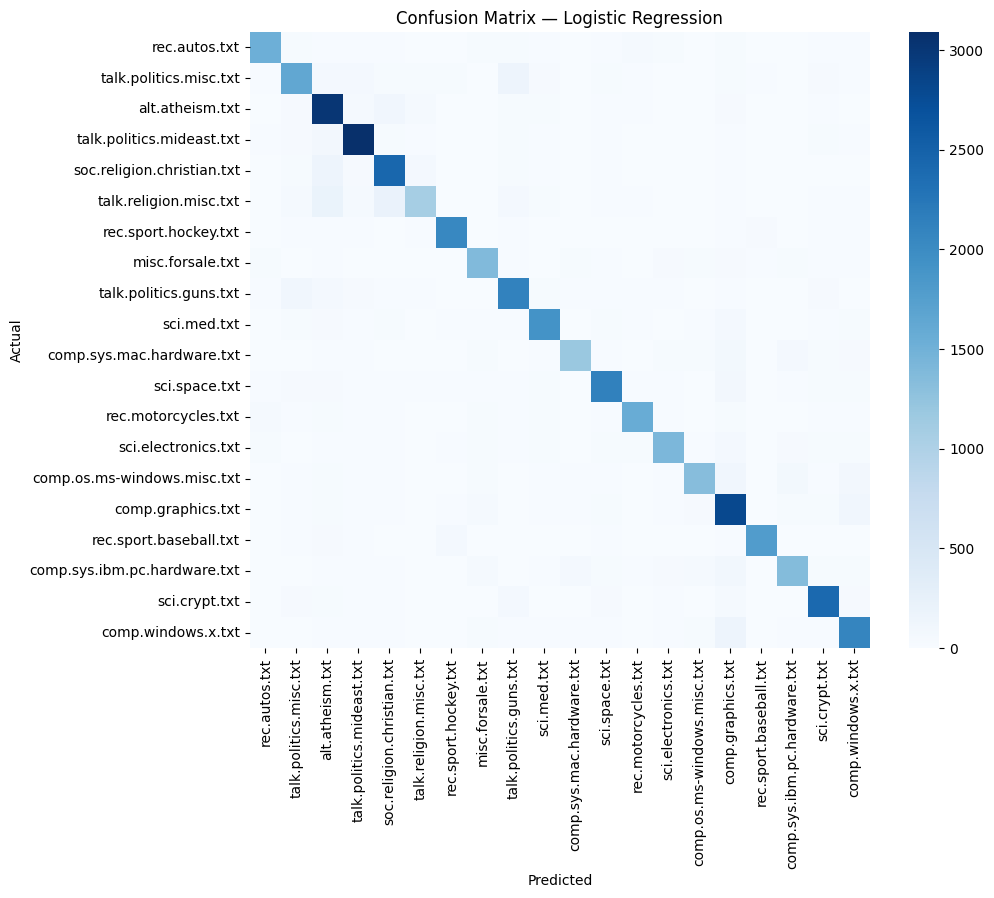

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = y.unique()
cm = confusion_matrix(y_test, y_pred_lr, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    xticklabels=labels,
    yticklabels=labels,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()


Difference Between Topic Modeling and Topic Classification:

Topic Modeling:
- Unsupervised
- Discovers latent topics
- No labeled data
- Used for exploration

Topic Classification:
- Supervised
- Predicts predefined labels
- Requires labeled data
- Used for automation

When to Use Each:
- Topic modeling → unknown structure
- Topic classification → known categories
